# 0. install lib

In [1]:
!pip install numpy tensorflow[and-cuda] seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 57.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 63.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 60.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 57.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 61.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 62.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 60.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 60.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 60.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━

# 1. Load and Preprocess Data

## import

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns

## Set random seeds for reproducibility

In [4]:
tf.random.set_seed(1337)
np.random.seed(1337)

## Load and preprocess the data

In [5]:
print("Loading and preprocessing data...")
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print("Data loaded and preprocessed.")

Loading and preprocessing data...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Data loaded and preprocessed.


# 2. Build Encoder

In [6]:
# Create the encoder model
print("Creating the encoder...")
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(input_img)
x = layers.Dense(1000, activation='relu')(x)
x = layers.Dense(500, activation='relu')(x)
x = layers.Dense(250, activation='relu')(x)
encoded_output = layers.Dense(2, activation='relu')(x)
encoder = Model(input_img, encoded_output)
print("Encoder created.")

Creating the encoder...


I0000 00:00:1730535511.826703     291 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 18446 MB memory:  -> device: 0, name: NVIDIA RTX 4000 Ada Generation, pci bus id: 0000:81:00.0, compute capability: 8.9


Encoder created.


# 3. Build Decoder

In [7]:
# Create the decoder model
print("Creating the decoder...")
decoder_input = layers.Input(shape=(2,))
x = layers.Dense(250, activation='relu')(decoder_input)
x = layers.Dense(500, activation='relu')(x)
x = layers.Dense(1000, activation='relu')(x)
x = layers.Dense(28 * 28, activation='sigmoid')(x)
decoded_output = layers.Reshape((28, 28, 1))(x)
decoder = Model(decoder_input, decoded_output)
print("Decoder created.")

Creating the decoder...
Decoder created.


# 4. Combine Encoder and Decoder into Autoencoder Model

In [8]:
# Combine encoder and decoder
print("Combining encoder and decoder...")
autoencoder_input = encoder.input  # Use the encoder's input as the input for the autoencoder
autoencoder_output = decoder(encoder(autoencoder_input))  # Pass the encoder's output to the decoder
autoencoder = Model(inputs=autoencoder_input, outputs=autoencoder_output)
print("Autoencoder model created.")

Combining encoder and decoder...
Autoencoder model created.


# 5. Compile the Model

In [9]:
# Compile the model
print("Compiling model...")
autoencoder.compile(optimizer='adam', loss='mse')
print("Model compiled.")

Compiling model...
Model compiled.


# 6. Train the Model

In [10]:
# Train the model
print("Training model...")
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks=[early_stop]
)
print("Model training complete.")

Training model...
Epoch 1/50


I0000 00:00:1730535527.446518     643 service.cc:148] XLA service 0x7dd284010550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730535527.446565     643 service.cc:156]   StreamExecutor device (0): NVIDIA RTX 4000 Ada Generation, Compute Capability 8.9
2024-11-02 08:18:47.540250: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730535527.745019     643 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-02 08:18:52.329704: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_706', 4 bytes spill stores, 4 bytes spill loads

2024-11-02 08:18:52.936947: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_342_0', 4 b

 83/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1116

I0000 00:00:1730535551.120945     643 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


216/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0870

2024-11-02 08:19:16.346709: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_314', 64 bytes spill stores, 64 bytes spill loads

2024-11-02 08:19:17.029601: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_293', 68 bytes spill stores, 68 bytes spill loads

2024-11-02 08:19:17.427992: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_342', 188 bytes spill stores, 188 bytes spill loads

2024-11-02 08:19:17.437103: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_314', 24 bytes spill stores, 24 bytes spill loads

2024-11-02 08:19:17.542201: I external/local_xla/xla/stream_ex

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0852

2024-11-02 08:19:44.040444: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33', 220 bytes spill stores, 228 bytes spill loads

2024-11-02 08:19:45.096947: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_75', 220 bytes spill stores, 228 bytes spill loads

2024-11-02 08:19:45.298033: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_68', 208 bytes spill stores, 208 bytes spill loads

2024-11-02 08:19:45.340809: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 180 bytes spill stores, 180 bytes spill loads



235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 152ms/step - loss: 0.0851 - val_loss: 0.0510
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0490 - val_loss: 0.0447
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0440 - val_loss: 0.0421
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0417 - val_loss: 0.0404
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0405 - val_loss: 0.0396
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0396 - val_loss: 0.0389
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0390 - val_loss: 0.0383
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0381 - val_loss: 0.0379
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0378 - val_loss: 0.0378
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0376 - val_loss: 0.0372
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0370 - val_loss: 0.0369
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

# 7. Visualize the Results

Visualizing results...


2024-11-02 08:20:59.936725: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 64 bytes spill stores, 64 bytes spill loads

2024-11-02 08:21:00.040595: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27', 408 bytes spill stores, 444 bytes spill loads

2024-11-02 08:21:01.630652: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 372 bytes spill stores, 404 bytes spill loads

2024-11-02 08:21:02.149897: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 116 bytes spill stores, 116 bytes spill loads

2024-11-02 08:21:02.934262: I external/local_xla/xla/stream_ex

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step


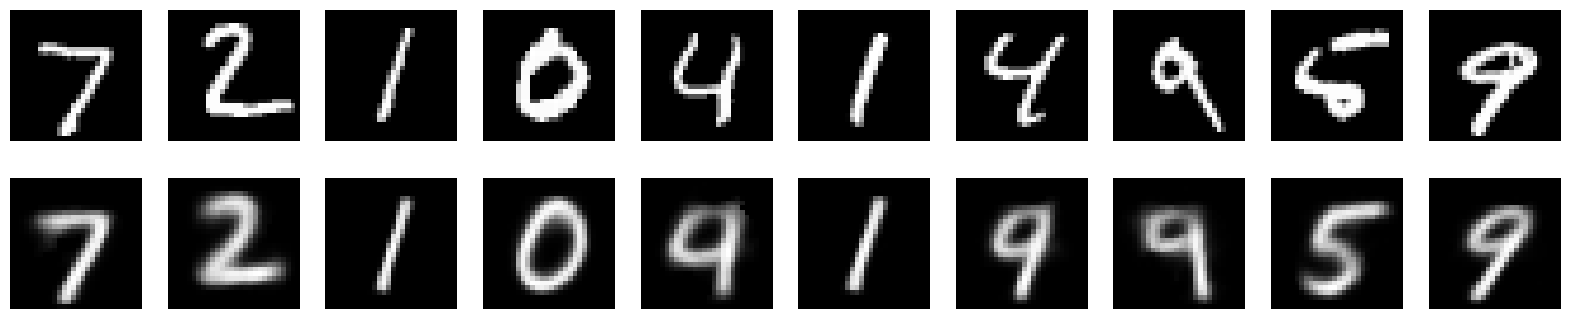

Visualization complete.


In [11]:
# Visualize results
print("Visualizing results...")
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
print("Visualization complete.")


# general

1. Regarding the expansion to 1000 dimensions:
- This is an example of the "bottleneck trick" or "overcomplete representation"
- By first expanding the dimensions before compression, we allow the network to:
  - Learn more robust feature representations
  - Better separate different patterns in higher dimensional space
  - Create a richer intermediate representation that helps prevent the network from learning just an identity function
  - Handle non-linear relationships more effectively

2. Using only two hidden layers would:
- Reduce the network's capacity to learn complex patterns
- Make it harder for the network to create meaningful separations in the latent space
- Result in more overlapped clusters in the 2D visualization
- Likely show less distinct separation between different digits

3. Changing to Leaky ReLU:
- Would help prevent "dying ReLU" problem where neurons can get stuck in a negative state
- Allows for small negative gradients instead of zero
- Could potentially lead to:
  - Better gradient flow
  - More active neurons
  - Slightly different cluster formations in the latent space
- To try this, you could modify the activation parameter in the code to:
```python
activation=layers.LeakyReLU(alpha=0.01)
```

4. Drawbacks of this type of autoencoder:
- Loses spatial information due to flattening the images
- No explicit preservation of local image structure
- Can be sensitive to rotation and translation
- May learn inefficient representations due to full connectivity
- High number of parameters due to dense layers
- Limited to fixed-size inputs

5. Regarding unique solutions:
- No, autoencoders typically don't have unique solutions
- Different random initializations can lead to:
  - Different weight configurations
  - Different latent space representations
  - Similar reconstruction quality
- The non-uniqueness comes from:
  - Non-convex optimization landscape
  - Multiple ways to encode the same information
  - Potential symmetries in the network architecture
